# 1. Campeonato Brasileiro (Investimento x Resultado)

Inicialmente a ideia é fazer uma análise do Campeonato Brasileiro - Série A, procurando uma relação entre o valor que os clubes investem em seus elencos e o quanto esse investimento dá de resultado. 
Os dados foram coletados do site Transfermarket(https://www.transfermarkt.com), que é uma plataforma que exibe detalhes financeiros de cada competição, clube e jogador do mundo. O período de análise é de 2008 até 2017, pois antes de 2008 nem todos os clubes do Brasil tinham seus dados completos no site e o campeonato de 2018 ainda não terminou para poder ser feita uma boa análise.

## Coleta de dados

Os dados foram coletados usando requests para pegar as páginas e BeatifulSoup para extrair as informações contidas no html de cada página.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq

In [2]:
campeonatos = []
for i in range(2007,2017):
    campeonatos.append(i)
campeonatos

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Os campeonatos são de 2008 até 2017, mas as urls variam de 2007 a 2016, pois seguem o modelo europeu(campeonatos se iniciam num ano e terminam no outro).

In [3]:
urls = []
for i in range(len(campeonatos)):
    urls.append('https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id='
                +str(campeonatos[i]))
urls

['https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2007',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2008',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2009',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2010',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2011',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2012',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2013',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2014',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id

In [4]:
#Só executar quando for fazer coleta
allNames = []
allSquads = []
allAges = []
allFPs = []
allValues = []
allAvgValues = []
allRelValues = []

allPos = []
allGDs = []
allPoints = []

allLogos = []
allLinks = []

baseLink = "https://www.transfermarkt.com"
headers = {'User-Agent': 'ajgan'}

for a in range(len(urls)):
    r = rq.get(urls[a], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    teams = parsed_page.find_all('tr')[11:31]
    positions = parsed_page.find_all('tr')[72:92]
    
    teamName = []
    teamSquad = []
    teamAge = []
    teamFP = []
    teamValue = []
    teamAvgValue = []
    teamRelValue = []

    teamPos = []
    teamGD = []
    teamPoints = []
    
    teamLogo = []
    teamLink = []

    for i in range(len(teams)):
        teamName.append(teams[i].find_all('td')[2].text)
        teamSquad.append(int(teams[i].find_all('td')[3].text))
        teamAge.append(float(teams[i].find_all('td')[4].text.replace(",",".")))
        teamFP.append(int(teams[i].find_all('td')[5].text))
        
        value = float((teams[i].find_all('td')[6].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamValue.append(value)
        avgValue = float((teams[i].find_all('td')[7].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamAvgValue.append(avgValue)
        
        teamLogo.append(teams[i].find_all('td')[0].img['src'])
        teamLink.append(baseLink + teams[i].find_all('td')[2].a['href'])
        
    for j in range(len(teamName)):
        for k in range(len(positions)):
            if (teamName[j] == positions[k].find_all('a')[1].text):
                teamPos.append(int(positions[k].find_all('td')[0].text))
                teamGD.append(positions[k].find_all('td')[4].text)
                teamPoints.append(int(positions[k].find_all('td')[5].text))
                break
    
    totalLeagueValue = 0
    for m in range(len(teams)):
        teamName[m] = teamName[m] + " - " + str(campeonatos[a]+1)
        totalLeagueValue += teamValue[m]
    
    for n in range(len(teams)):
        teamRelValue.append(teamValue[n]/totalLeagueValue)
        
        
    allNames.extend(teamName)
    allSquads.extend(teamSquad)
    allAges.extend(teamAge)
    allFPs.extend(teamFP)
    allValues.extend(teamValue)
    allAvgValues.extend(teamAvgValue)
    allRelValues.extend(teamRelValue)

    allPos.extend(teamPos)
    allGDs.extend(teamGD)
    allPoints.extend(teamPoints)
    
    allLogos.extend(teamLogo)
    allLinks.extend(teamLink)

In [5]:
#Só executar pós-coleta
columns = ['Equipe', 'Pos', 'Pts', 'SG', 'TamanhoElenco', 'IdadeElenco',
           'JogadoresEstrangeiros','Valor', 'ValorMedio', 'ValorRelativo', 'Escudo', 'Link']

brasileirao = pd.DataFrame(list(zip(allNames, allPos, allPoints, allGDs, allSquads, allAges,
                                    allFPs, allValues, allAvgValues, allRelValues, allLogos, allLinks))
                          , columns=columns)

brasileirao.to_csv("brasileirao.csv")

In [6]:
#Só executar se a coleta já tiver sido feita
brasileirao = pd.read_csv("brasileirao.csv", index_col=0)

In [7]:
brasileirao.head()

,Equipe,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo,Escudo,Link
0,São Paulo - 2008,1,75,30,41,24.2,1,54150000.0,1320000.0,0.298232,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/fc-sao-paulo/sta...
1,Palmeiras - 2008,4,65,10,28,23.4,1,23600000.0,843000.0,0.129977,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/se-palmeiras-sao...
2,Flamengo - 2008,5,64,20,30,23.5,1,18500000.0,617000.0,0.101889,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/flamengo-rio-de-...
3,Internacional - 2008,6,54,1,34,23.3,4,18000000.0,529000.0,0.099135,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/sc-internacional...
4,Grêmio - 2008,2,72,24,34,22.7,1,11900000.0,350000.0,0.065539,https://tmssl.akamaized.net//images/wappen/tin...,https://www.transfermarkt.com/gremio-foot-ball...


## Análise preliminar

In [8]:
brasileirao.describe()

,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,2.000000e+02,2.000000e+02,200.000000
mean,10.500000,51.86000,0.010000,41.150000,23.988500,2.59000,3.539675e+07,8.462600e+05,0.050000
std,5.780751,11.38148,15.111974,9.684858,0.937289,1.97774,2.615462e+07,5.883257e+05,0.036932
min,1.000000,20.00000,-57.000000,20.000000,21.600000,0.00000,1.000000e+06,3.000000e+04,0.004876
25%,5.750000,45.00000,-9.000000,34.000000,23.300000,1.00000,1.385000e+07,3.437500e+05,0.020603
50%,10.500000,51.00000,-1.000000,41.000000,23.950000,2.00000,3.009000e+07,7.585000e+05,0.040720
75%,15.250000,59.00000,11.000000,47.250000,24.600000,4.00000,5.308250e+07,1.320000e+06,0.072632
max,20.000000,81.00000,40.000000,77.000000,26.500000,8.00000,1.158000e+08,2.520000e+06,0.298232


Alguns pontos interessantes de se destacar são:
- Em geral, os clubes brasileiros tem elencos muito grandes. Em um esporte que só jogam 11 de cada vez, ter uma média de elenco beirando os 41 é algo muito alto. Além diso, o valor máximo e mínimo assustam muito, ao percebermos que algum clube teve um elenco de 77 jogadores e outro de apenas 20.
- A média de idade dos clubes brasileiros é relativamente baixa. Talvez por existirem muitos jogadores jovens no futebol brasileiro e esses serem baratos, mas de boa qualidade.
- A média de jogadores estrangeiros é de 2,59. Eu esperava um número menor, pois não me aparenta ter de 2 a 3 estrangeiros em cada clube. Mas essa média passa a ser bem aceitável por conta do terceiro quartil e do valor máximo. A minha impressão errada se justifica pelo valor do primeiro quartil e também porque esses dados cobrem todo o elenco e alguns jogadores estrangeiros podem passar desapercebidos pelo grande público.
- A distância que temos entre o valor máximo investido e o valor do terceiro quartil dos dados é bem significativa. O clube que mais investiu tem praticamente o dobro do investimento do clube representante do terceiro quartil.
- Na parte do valor relativo os números tem um comportamento bem normal, menos no valor máximo, quando notamos que um clube teve um investimento que representa sozinho 30% do investimento de todos os 20 clubes juntos.

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

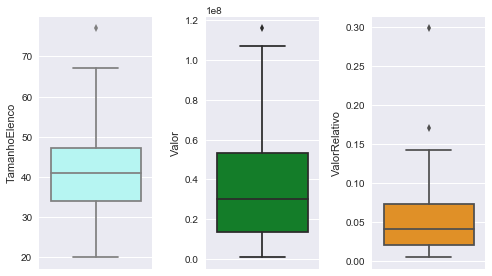

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(7,4))
sns.boxplot(y = brasileirao["TamanhoElenco"], ax = ax1, color=sns.xkcd_rgb["light cyan"])
sns.boxplot(y = brasileirao["Valor"], ax=ax2, color=sns.xkcd_rgb["emerald green"])
sns.boxplot(y = brasileirao["ValorRelativo"], ax=ax3, color=sns.xkcd_rgb["tangerine"])
fig.tight_layout()
plt.show()

De fato, os clubes citados acima como surpresa são todos outliers na distribuição dos dados, como nos mostra os boxplots acima. (o clube com 77 jogadores, o clube que vale 115.8 milhões de euros e o clube que representa 30% do valor total do seu campeonato.)

In [11]:
clubea = 0
clubeb = 0
clubec = 0
for i in range(len(brasileirao)):
    if (brasileirao["TamanhoElenco"][i] == 77):
        clubea = i
        
    if (brasileirao["Valor"][i] >= 115000000):
        clubeb = i
    if (brasileirao["ValorRelativo"][i] >= 0.29):
        clubec = i
        
print("O clube com 77 jogadores é o "+brasileirao["Equipe"][clubea])
print("O clube mais caro é o "+brasileirao["Equipe"][clubeb])
print("O clube com maior valor relativo é o "+brasileirao["Equipe"][clubec])
print("")
print(brasileirao.T[clubea])
print("")
print(brasileirao.T[clubeb])
print("")
print(brasileirao.T[clubec])

O clube com 77 jogadores é o Avaí FC - 2011
O clube mais caro é o São Paulo - 2013
O clube com maior valor relativo é o São Paulo - 2008

Equipe                                                      Avaí FC - 2011
Pos                                                                     20
Pts                                                                     31
SG                                                                     -30
TamanhoElenco                                                           77
IdadeElenco                                                           24.3
JogadoresEstrangeiros                                                    1
Valor                                                            3.373e+07
ValorMedio                                                          438000
ValorRelativo                                                    0.0334872
Escudo                   https://tmssl.akamaized.net//images/wappen/tin...
Link                     https://www.

Um fato interessante é que o São Paulo de 2008 valia mais da metade do valor do São Paulo de 2013, mas ainda assim representa uma fatia de mais que o dobro no seu respectivo campeonato. Isso, além de provar que os valores de mercado cresceram com o tempo, também nos mostra que as outras equipes conseguiram equilibrar um pouco mais na questão financeira.
<br> Outro detalhe é o Avaí de 2011, que mesmo com um elenco de 77 jogadores foi o lanterna do campeonato, evidenciando que uma grande quantidade de jogadores não ajuda. Fato que pode até atrapalhar por evidenciar falta de planejamento.

## Visualização dos dados

Com esse dataset foi feita uma visualização usando <b>d3.js</b> para tentar analisar a relação entre o dinheiro investido pelo clube e sua posição final na tabela. A escolha de usar d3 foi por conta da versatilidade da ferramenta e de sua qualidade. <br>A visualização pode ser acessada através do arquivo <b>brasileiraov1.html</b> que está no mesmo diretório desse Notebook.
<br>Visualizações mais simples foram feitas usando Seaborn apenas para manter tudo documentado no próprio Notebook

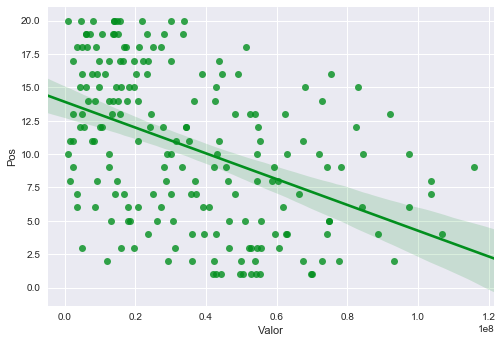

In [12]:
ax = sns.regplot(x=brasileirao["Valor"], y=brasileirao["Pos"], color=sns.xkcd_rgb["emerald green"])
plt.show(ax)

In [13]:
model = smf.ols("Pos ~ Valor",data=brasileirao)
result = model.fit()

pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,1.391912e+01,6.212385e-01,22.405431,3.383336e-56
Valor,-9.659406e-08,1.412791e-08,-6.837109,9.790031e-11


A partir desse modelo de regressão se constata que existe uma relação entre o valor investido pelo clube e sua posição  final na tabela. Como a melhor posição possível é a de menor valor(1º lugar), a relação é inversa. A relação nos mostra que se um clube não investisse dinheiro nenhum, a regressão o colocaria em 14º(cenário impossível, mas apenas matematicamente hipotético). A regressão também nos mostra que pra cada 10 milhões de Euros investidos o clube diminui uma posição(o que na verdade significa que ele ganha uma posição, tendo em vista a relação inversa).

Apesar de percebermos que existe uma relação, ela é um pouco fraca e não nos diz tanto. Fazendo uso da interatividade do d3, podemos perceber que os valores investidos mudam muito com o decorrer dos anos e a relação individual de cada campeonato é bem mais significativa de medir, já que os valores de cada clube estão relacionados com a realidade do mercado para o ano correspondente. <br>Para fazer uma boa análise, é melhor olhar ano a ano. Observando cada campeonato individualmente, fica bem mais clara a relação entre dinheiro e resultado(exceto no campeonato de 2013, que acabou não seguindo o padrão, como pode ser observado na visualização interativa).

## Dando ênfase a um problema específico

Numa realidade em que os clubes possuem orçamento restrito e assumindo que eles não tem mais dinheiro disponível além do que o já investido, é inviável dizer que basta um clube investir mais e eles se sairão melhor. Temos que partir da premissa que o clube possui um orçamento fixo, mas precisa se dar bem, mesmo que esse valor disponível seja baixo. Diante dessa situação, resolvi analisar mais a fundo a realidade do futebol nordestino e ver quais campanhas deram certo e quais deram errado, para ver se existe algum padrão nessas campanhas. Existindo algum padrão, fica bem mais viável dizer como os clubes devem investir o seu pouco dinheiro e mesmo assim fazer uma boa campanha. Levando em conta os clubes pernambucanos temos:<br>*campanhas de sucesso foram destacadas em <b>negrito.</b>
- Santa Cruz(PE): 1 campanha - 2016
- Ceará(CE): 2 campanhas - <b>2010</b>, 2011
- Náutico(PE): 4 campanhas - <b>2008</b>, 2009, <b>2012</b>, 2013
- Bahia(BA): 5 campanhas - <b>2011</b>, <b>2012</b>, <b>2013</b>, 2014 <b>2017</b>
- Vitória(BA): 7 campanhas - <b>2008</b>, <b>2009</b>, 2010, <b>2013</b>, 2014, <b>2016</b>, <b>2017</b>
- Sport(PE): 7 campanhas <b>2008</b>, 2009, 2012, <b>2014</b>, <b>2015</b>, <b>2016</b>, <b>2017</b>

No total temos 26 participações de clubes nordestinos, sendo que 17 não resultaram em rebaixamento. Acredito que essa quantidade seja o suficiente para extrair algumas informações úteis.

## Nova coleta

In [14]:
clubesNE = ["Santa", "Ceará", "Náutico", "Bahia", "Vitória", "Sport"]

In [15]:
teamNamesNE = []
teamLinksNE = []
teamSquadNE = []
teamAgeNE = []
teamFPNE = []
teamPosNE = []
teamPointsNE = []

for i in range(len(brasileirao)):
    for club in clubesNE:
        if (club in brasileirao["Equipe"][i]):
            teamNamesNE.append(brasileirao["Equipe"][i])
            teamLinksNE.append(brasileirao["Link"][i])
            teamSquadNE.append(brasileirao["TamanhoElenco"][i])
            teamAgeNE.append(brasileirao["IdadeElenco"][i])
            teamFPNE.append(brasileirao["JogadoresEstrangeiros"][i])
            teamPosNE.append(brasileirao["Pos"][i])
            teamPointsNE.append(brasileirao["Pts"][i])

In [16]:
sucessList = []
for i in range(len(teamPosNE)):
    if(teamPosNE[i] > 16):
        sucessList.append(0)
    else:
        sucessList.append(1)

In [17]:
#Só executar quando for fazer coleta

headers = {'User-Agent': 'ajgan'}
teamGol = []
teamGolMax = []
teamDef = []
teamDefMax = []
teamMid = []
teamMidMax = []
teamAta = []
teamAtaMax = []

for i in range(len(teamLinksNE)):
    r = rq.get(teamLinksNE[i], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    evenPlayers = parsed_page.find_all('tr', class_='even')[0:-2]
    oddPlayers = parsed_page.find_all('tr', class_='odd')[0:-3]
    myPlayers = evenPlayers + oddPlayers
    
    posList = []
    priceList = []
    for i in range(len(myPlayers)):
        posList.append(myPlayers[i].find_all('td')[0]['title'])
        value = ((myPlayers[i].find_all('td')[-1].text
                             .replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000").replace("\xa0","")))
        if (len(value) < 2):
            value = 0
        priceList.append(int(value))
     
    goleiros = []
    zagueiros = []
    meias = []
    atacantes = []
    for j in range(len(posList)):
        if(posList[j]=='Torwart' or posList[j]=='Goalkeeper'):
            goleiros.append(priceList[j])
        elif(posList[j]=='Abwehr' or posList[j]=='Defence'):
            zagueiros.append(priceList[j])
        elif(posList[j]=='Mittelfeld' or posList[j]=='Midfield'):
            meias.append(priceList[j])
        else:
            atacantes.append(priceList[j])
    
    teamGol.append(float(format(np.sum(goleiros)/np.sum(priceList) , '.3f')))
    teamGolMax.append(float(format(np.max(goleiros)/np.sum(priceList) , '.3f')))
    
    teamDef.append(float(format(np.sum(zagueiros)/np.sum(priceList) , '.3f')))
    teamDefMax.append(float(format(np.max(zagueiros)/np.sum(priceList) , '.3f')))
    
    teamMid.append(float(format(np.sum(meias)/np.sum(priceList) , '.3f')))
    teamMidMax.append(float(format(np.max(meias)/np.sum(priceList) , '.3f')))
    
    teamAta.append(float(format(np.sum(atacantes)/np.sum(priceList) , '.3f')))
    teamAtaMax.append(float(format(np.max(atacantes)/np.sum(priceList) , '.3f')))

In [19]:
#regra de dissimilaridade pra calcular o quão balanceado é o investimento nos setores
def gini(arr):
    
    somai = 0
    somatot = arr[-1]
    for i in range(len(arr)-1):
        somaj = 0
        for j in range(i+1, len(arr)):
            somaj += abs(arr[i] - arr[j])
        somai += somaj
        somatot += arr[i]
    mult = (len(arr) - 1) * somatot
    
    # o '1 - result' é pra transformar a função de dissimilaridade em um função de similaridade
    return (1- (somai/mult))

In [20]:
#Só executar pós-coleta

columnsNE = ['Equipe', 'Link', 'Pos', 'Pts', 'TamanhoElenco', 'IdadeElenco', 
           'JogadoresEstrangeiros', 'SetorGol','SetorDef', 'SetorMeio', 'SetorAtq',
           'MelhorGol', 'MelhorDef', 'MelhorMeio', 'MelhorAtq', 'Sucesso']

brasileiraoNE = pd.DataFrame(list(zip(teamNamesNE, teamLinksNE, teamPosNE, teamPointsNE, teamSquadNE, 
                                      teamAgeNE, teamFPNE, teamGol, teamDef, teamMid, teamAta,
                                      teamGolMax, teamDefMax, teamMidMax, teamAtaMax, sucessList ))
                             , columns=columnsNE)

In [21]:
#Só executar pós-coleta
teamEq = []
for i in range(len(brasileiraoNE)):
    teamEq.append(float(format(gini(brasileiraoNE.iloc[:,7:11].T[i].values) , '.3f')))

In [22]:
#Só executar pós-coleta

columnsNE = ['Equipe', 'Link', 'Pos', 'Pts', 'TamanhoElenco', 'IdadeElenco', 
           'JogadoresEstrangeiros', 'SetorGol','SetorDef', 'SetorMeio', 'SetorAtq', 'SimilaridadeSetores',
           'MelhorGol', 'MelhorDef', 'MelhorMeio', 'MelhorAtq', 'Sucesso']

brasileiraoNE = pd.DataFrame(list(zip(teamNamesNE, teamLinksNE, teamPosNE, teamPointsNE, teamSquadNE, 
                                      teamAgeNE, teamFPNE, teamGol, teamDef, teamMid, teamAta, teamEq,
                                      teamGolMax, teamDefMax, teamMidMax, teamAtaMax, sucessList ))
                             , columns=columnsNE)

brasileiraoNE.to_csv("brasileiraoNE.csv")

In [23]:
#Só executar se a coleta já tiver sido feita
brasileiraoNE = pd.read_csv("brasileiraoNE.csv", index_col=0)

In [24]:
brasileiraoNE.head()

,Equipe,Link,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
0,Náutico - 2008,https://www.transfermarkt.com/clube-nautico-ca...,16,44,29,24.3,0,0.000,0.168,0.328,0.504,0.443,0.000,0.134,0.134,0.504,1
1,Sport Recife - 2008,https://www.transfermarkt.com/sport-club-do-re...,11,52,33,25.3,0,0.000,0.938,0.031,0.031,0.062,0.000,0.938,0.031,0.031,1
2,EC Vitória - 2008,https://www.transfermarkt.com/esporte-clube-vi...,10,52,33,24.2,1,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1
3,Sport Recife - 2009,https://www.transfermarkt.com/sport-club-do-re...,20,31,30,25.0,1,0.050,0.405,0.396,0.149,0.563,0.038,0.115,0.048,0.072,0
4,Náutico - 2009,https://www.transfermarkt.com/clube-nautico-ca...,19,38,33,24.1,2,0.052,0.466,0.168,0.314,0.537,0.050,0.165,0.083,0.138,0


## Análises e Modelos Estatísticos

In [25]:
brasileiraoNE.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,14.423077,44.230769,41.346154,24.384615,1.769231,0.039577,0.299192,0.355000,0.306231,0.539115,0.025846,0.116654,0.099462,0.135500,0.653846
std,3.931138,8.580479,7.812515,0.873472,1.656688,0.025221,0.167188,0.133184,0.171771,0.168990,0.016407,0.173615,0.058207,0.198378,0.485165
min,5.000000,20.000000,29.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000
25%,12.000000,39.500000,34.250000,23.700000,0.250000,0.029000,0.219000,0.334500,0.242500,0.538500,0.015000,0.056500,0.064000,0.062250,0.000000
50%,15.000000,45.500000,43.000000,24.150000,1.000000,0.043000,0.278000,0.389500,0.266500,0.578500,0.027500,0.073000,0.095500,0.074500,1.000000
75%,17.000000,48.750000,45.000000,24.900000,3.000000,0.054500,0.360250,0.409500,0.356500,0.627000,0.038000,0.114750,0.119500,0.106000,1.000000
max,20.000000,59.000000,57.000000,26.200000,6.000000,0.090000,0.938000,0.617000,1.000000,0.711000,0.051000,0.938000,0.284000,1.000000,1.000000


Os clubes nordestinos possuem comportamentos semelhantes, com variações normais dentre as variáveis observadas. As anomalias ficam entre os valores dos setores e de jogadores, isso se deve a dados incompletos sobre alguns clubes nos campeonatos mais antigos do site, possivelmente não atrapalha muito a análise já que esses dados são outliers e não uma regra.

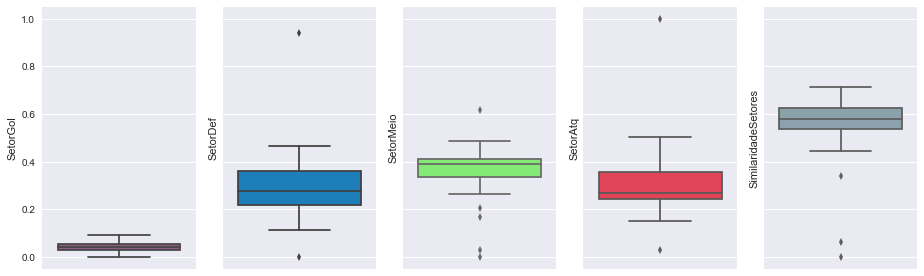

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(13,4))
sns.boxplot(y = brasileiraoNE["SetorGol"], ax = ax1, color=sns.xkcd_rgb["purplish"])
sns.boxplot(y = brasileiraoNE["SetorDef"], ax=ax2, color=sns.xkcd_rgb["cerulean"])
sns.boxplot(y = brasileiraoNE["SetorMeio"], ax=ax3, color=sns.xkcd_rgb["lighter green"])
sns.boxplot(y = brasileiraoNE["SetorAtq"], ax=ax4, color=sns.xkcd_rgb["strawberry"])
sns.boxplot(y = brasileiraoNE["SimilaridadeSetores"], ax=ax5, color=sns.xkcd_rgb["bluegrey"])
fig.tight_layout()
plt.show()

Em geral, nota-se que os clubes nordestinos investem menos nos goleiros(o que é totalmente aceitável, tendo em vista que apenas 1 goleiro entra em campo, contra 10 jogadores de linha). Além disso, percebe-se que os clubes costumam investir de forma bem balanceada entre os 3 setores restantes, com uma leve preferência com o setor de Meio-Campo. Dá para se concluir indiretamente, que os clubes dão muita importância para o setor de ataque, pois o investimento é bem balanceado, mas normalmente os clubes possuem mais defensores e meias, devido à quantidade que entra em campo(os esquemas mais comuns são 4-4-2, 3-5-2 ou 4-3-3). Então, se o investimento é similar e existem menos atacantes, os atacantes devem ser mais caros que os demais jogadores.

O próximo passo é treinar uma árvore de decisão para ver se existe um padrão entre os investimentos que dão certo. Com essa árvore pretende-se prever o resultado dos 4 clubes nordestinos que estão disputando o Brasileirão desse ano.

In [27]:
from sklearn import tree
import graphviz

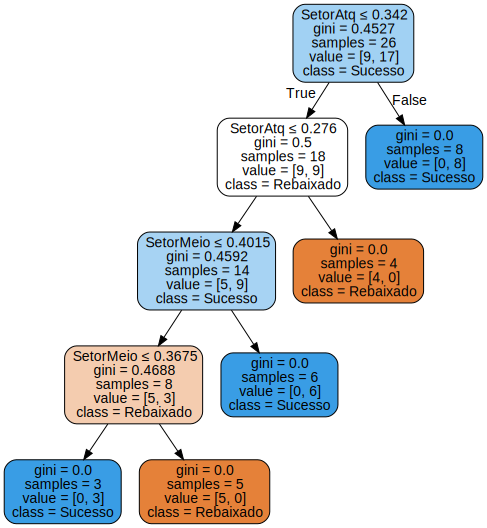

In [28]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

traindata = brasileiraoNE.iloc[:,4:-1]
traintarget = brasileiraoNE["Sucesso"]

clf = clf.fit(traindata, traintarget)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=traindata.T.index,
                                class_names=['Rebaixado', 'Sucesso'],
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Um exemplo de árvore pode ser vista acima. Apesar de separar bem, ela é um pouco inconclusiva, por usar diferentes limiares da mesma feature. Os dois nós que ainda consegue sem expressivos é o que coloca que o investimento no Ataque maior que 34,2% resulta sempre em sucesso(8 dos 26 casos) e o nó que fala do investimento em Meio-Campo ser maior que 40,15% e resulta em sucesso(6 dos 15 casos restantes). Então mesmo as informações da árvore não sendo muito boas, ainda assim podemos ver o quão importante se mostra o investimento em Ataque e Meio 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfclf = RandomForestClassifier(criterion = 'gini', n_estimators=1000, random_state=0)
rfclf.fit(traindata, traintarget)
importances = rfclf.feature_importances_

In [31]:
features = traindata.T.index
featImportances = []
for i in range(len(features)):
    featImportances.append([features[i], float(format(importances[i], '.4f'))])
featImportances.sort(key=lambda x: x[1], reverse=True)
featImportances

[['IdadeElenco', 0.1063],
 ['SetorAtq', 0.1035],
 ['SetorGol', 0.1018],
 ['SetorMeio', 0.095],
 ['SetorDef', 0.0935],
 ['SimilaridadeSetores', 0.09],
 ['MelhorGol', 0.0884],
 ['MelhorAtq', 0.0852],
 ['MelhorMeio', 0.064],
 ['TamanhoElenco', 0.0629],
 ['MelhorDef', 0.0622],
 ['JogadoresEstrangeiros', 0.0472]]

Ao treinar uma Random Forest conseguimos dar oportunidade a todas as features e então podemos ver quais são as mais significativas. Diferente da árvore unitára gerada anteriormente, aqui não é possível visualizar todo o caminho da decisão, mas é possível tirar boas conclusões também. Antes de afirmar qualquer coisa, é importante saber se a influência dessas features são positivas ou negativas. Separarei os dois Data Frames(de sucesso e fracasso) para ver informações gerais e entender a real influência das features.

In [32]:
sucDF = brasileiraoNE.copy()
failDF = brasileiraoNE.copy()
for i in range(len(brasileiraoNE)):
    if (brasileiraoNE['Sucesso'][i] == 1):
        failDF = failDF.drop(i)
    else:
        sucDF = sucDF.drop(i)

In [33]:
sucDF.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,12.352941,49.000000,41.470588,24.247059,1.705882,0.034706,0.285588,0.346882,0.332824,0.504471,0.022059,0.127118,0.105176,0.169294,1.0
std,3.200414,4.636809,7.212122,0.877580,1.649421,0.025734,0.198478,0.156462,0.204111,0.198436,0.016146,0.213565,0.068633,0.239980,0.0
min,5.000000,43.000000,29.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.031000,1.0
25%,11.000000,46.000000,38.000000,23.500000,0.000000,0.011000,0.205000,0.291000,0.253000,0.471000,0.011000,0.048000,0.075000,0.071000,1.0
50%,12.000000,48.000000,43.000000,24.000000,1.000000,0.038000,0.266000,0.381000,0.271000,0.575000,0.024000,0.070000,0.096000,0.092000,1.0
75%,15.000000,52.000000,45.000000,24.600000,3.000000,0.051000,0.355000,0.417000,0.365000,0.606000,0.037000,0.114000,0.118000,0.142000,1.0
max,16.000000,59.000000,56.000000,25.800000,4.000000,0.090000,0.938000,0.617000,1.000000,0.711000,0.049000,0.938000,0.284000,1.000000,1.0


In [34]:
failDF.describe()

,Pos,Pts,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq,Sucesso
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,18.333333,35.222222,41.111111,24.644444,1.888889,0.048778,0.324889,0.370333,0.256000,0.604556,0.033000,0.096889,0.088667,0.071667,0.0
std,1.224745,6.887993,9.306509,0.853099,1.763834,0.022753,0.086175,0.077886,0.067383,0.055864,0.015223,0.047988,0.031085,0.028085,0.0
min,17.000000,20.000000,29.000000,23.500000,0.000000,0.000000,0.222000,0.168000,0.149000,0.537000,0.000000,0.038000,0.048000,0.040000,0.0
25%,17.000000,31.000000,33.000000,24.100000,1.000000,0.050000,0.274000,0.374000,0.239000,0.556000,0.028000,0.070000,0.063000,0.061000,0.0
50%,18.000000,38.000000,42.000000,24.400000,1.000000,0.052000,0.285000,0.396000,0.262000,0.618000,0.034000,0.077000,0.083000,0.071000,0.0
75%,19.000000,39.000000,45.000000,25.000000,2.000000,0.059000,0.405000,0.400000,0.314000,0.646000,0.039000,0.115000,0.120000,0.076000,0.0
max,20.000000,42.000000,57.000000,26.200000,6.000000,0.078000,0.466000,0.427000,0.332000,0.681000,0.051000,0.180000,0.128000,0.138000,0.0


A partir das informações das importâncias das features e de uma comparação entre médias e quartis, boas informações podem ser retiradas disso:
- É importante ter um elenco mais <b>jovem</b>. Apesar da distância entre as médias não ser tão grande, é importante salientar que o valor da idade é um valor médio, e pequenas variâncias nesse número tem um impacto relativamente maior no elenco inteiro. Vale destacar que os valores de todos os quartis são menores para os clubes que sucederam.
- Investir no  <b>Ataque</b> é o mais importante!!! Apesar das features dos outros setores terem influência parecida, a partir dos valores do describe, percebemos que os times que tiveram sucesso tiveram bem menos investimento nos outros 3 setores. A influência alta dita pela floresta não fala muita coisa, pois ela pode ter impacto negativo também, como pode ser visto no caso do investimento em goleiros.
- Investir em um <b>atacante de qualidade</b> dá mais retorno do que o investimento em um jogador de peso de outro setor. Os times que tiveram sucesso tinham um atacante custando em média 17% do valor total do elenco, enquanto os clubes que falharam tinha o seu melhor atacante custando em média apenas 7% do elenco.
- O investimento em jogadores de peso em outros setores não tem muita influência, assim como a quantidade de jogadores estrangeiros no elenco e nem o tamanho do elenco. Os clubes que tiveram sucesso e os que falharam tiveram valores bem similares nessas categorias
- Apesar do indicado ser valorizar o ataque, <b>não se deve ignorar os outros setores</b>. Os times que obtiveram sucesso, apesar de priorizarem o ataque, tinham um bom índice de similaridade entre os setores, com a mediana em 0.57 

## Predição para 2018

Com os modelos já treinados e analisados, o próximo passo é coletar os dados dos 4 clubes nordestinos que estão jogando Série A desse ano e tentar predizer o sucesso ou fracasso deles. Lembrando que o orçamento total não é levado em consideração, pois como já foi dito: não dá pra aconselhar um clube a investir mais, temos que levar em conta que o orçamento dos clubes são limitados e fixos.

In [35]:
url2018 = 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2017'

In [36]:
#Só executar quando for fazer coleta

#PARTE 01
names2018 = []
squads2018 = []
ages2018 = []
fp2018 = []

links2018 = []

baseLink = "https://www.transfermarkt.com"
headers = {'User-Agent': 'ajgan'}

r = rq.get(url2018, headers=headers)
parsed_page = BeautifulSoup(r.text,"html.parser")

teams2018 = parsed_page.find_all('tr')[11:31]

for i in range(len(teams2018)):
    for j in range(len(clubesNE)):
        if (clubesNE[j] in teams2018[i].find_all('td')[2].text):
            names2018.append(teams2018[i].find_all('td')[2].text + ' - 2018')
            squads2018.append(int(teams2018[i].find_all('td')[3].text))
            ages2018.append(float(teams2018[i].find_all('td')[4].text.replace(",",".")))
            fp2018.append(int(teams2018[i].find_all('td')[5].text))

            links2018.append(baseLink + teams2018[i].find_all('td')[2].a['href'])

#PARTE 02

teamGol2018 = []
teamGolMax2018 = []
teamDef2018 = []
teamDefMax2018 = []
teamMid2018 = []
teamMidMax2018 = []
teamAta2018 = []
teamAtaMax2018 = []

for i in range(len(links2018)):
    r = rq.get(links2018[i], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    evenPlayers = parsed_page.find_all('tr', class_='even')[0:-2]
    oddPlayers = parsed_page.find_all('tr', class_='odd')[0:-3]
    myPlayers = evenPlayers + oddPlayers
    
    posList = []
    priceList = []
    for i in range(len(myPlayers)):
        posList.append(myPlayers[i].find_all('td')[0]['title'])
        value = ((myPlayers[i].find_all('td')[-1].text
                             .replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000").replace("\xa0","")))
        if (len(value) < 2):
            value = 0
        priceList.append(int(value))
     
    goleiros = []
    zagueiros = []
    meias = []
    atacantes = []
    for j in range(len(posList)):
        if(posList[j]=='Torwart' or posList[j]=='Goalkeeper'):
            goleiros.append(priceList[j])
        elif(posList[j]=='Abwehr' or posList[j]=='Defence'):
            zagueiros.append(priceList[j])
        elif(posList[j]=='Mittelfeld' or posList[j]=='Midfield'):
            meias.append(priceList[j])
        else:
            atacantes.append(priceList[j])
    
    teamGol2018.append(float(format(np.sum(goleiros)/np.sum(priceList) , '.3f')))
    teamGolMax2018.append(float(format(np.max(goleiros)/np.sum(priceList) , '.3f')))
    
    teamDef2018.append(float(format(np.sum(zagueiros)/np.sum(priceList) , '.3f')))
    teamDefMax2018.append(float(format(np.max(zagueiros)/np.sum(priceList) , '.3f')))
    
    teamMid2018.append(float(format(np.sum(meias)/np.sum(priceList) , '.3f')))
    teamMidMax2018.append(float(format(np.max(meias)/np.sum(priceList) , '.3f')))
    
    teamAta2018.append(float(format(np.sum(atacantes)/np.sum(priceList) , '.3f')))
    teamAtaMax2018.append(float(format(np.max(atacantes)/np.sum(priceList) , '.3f')))

In [37]:
#Só executar pós-coleta

columnsNE2018 = ['Equipe', 'Link', 'TamanhoElenco', 'IdadeElenco', 
           'JogadoresEstrangeiros', 'SetorGol','SetorDef', 'SetorMeio', 'SetorAtq',
           'MelhorGol', 'MelhorDef', 'MelhorMeio', 'MelhorAtq']

brasileiraoNE2018 = pd.DataFrame(list(zip(names2018, links2018, squads2018, 
                                      ages2018, fp2018, teamGol2018, teamDef2018, teamMid2018, teamAta2018,
                                      teamGolMax2018, teamDefMax2018, teamMidMax2018, teamAtaMax2018 ))
                             , columns=columnsNE2018)

In [38]:
brasileiraoNE2018

,Equipe,Link,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq
0,EC Bahia - 2018,https://www.transfermarkt.com/ec-bahia/startse...,31,25.6,2,0.063,0.309,0.454,0.173,0.058,0.050,0.083,0.058
1,EC Vitória - 2018,https://www.transfermarkt.com/esporte-clube-vi...,41,24.9,1,0.040,0.438,0.300,0.222,0.032,0.101,0.040,0.081
2,Sport Recife - 2018,https://www.transfermarkt.com/sport-club-do-re...,33,26.3,1,0.040,0.369,0.471,0.119,0.021,0.085,0.085,0.053
3,Ceará SC - 2018,https://www.transfermarkt.com/ceara-sporting-c...,34,28.2,2,0.078,0.311,0.336,0.276,0.040,0.063,0.075,0.045


In [39]:
#Só executar pós-coleta
teamEq2018 = []
for i in range(len(brasileiraoNE2018)):
    teamEq2018.append(float(format(gini(brasileiraoNE2018.iloc[:,5:9].T[i].values) , '.3f')))

In [40]:
#Só executar pós-coleta

columnsNE2018 = ['Equipe', 'Link', 'TamanhoElenco', 'IdadeElenco', 
           'JogadoresEstrangeiros', 'SetorGol','SetorDef', 'SetorMeio', 'SetorAtq', 'SimilaridadeSetores',
           'MelhorGol', 'MelhorDef', 'MelhorMeio', 'MelhorAtq']

brasileiraoNE2018 = pd.DataFrame(list(zip(names2018, links2018, squads2018, 
                                      ages2018, fp2018, teamGol2018, teamDef2018, teamMid2018, teamAta2018, teamEq2018,
                                      teamGolMax2018, teamDefMax2018, teamMidMax2018, teamAtaMax2018))
                             , columns=columnsNE2018)

brasileiraoNE2018.to_csv("brasileiraoNE2018.csv")

In [41]:
#Só executar se a coleta já tiver sido feita
brasileiraoNE2018 = pd.read_csv("brasileiraoNE2018.csv", index_col=0)

In [42]:
brasileiraoNE2018

,Equipe,Link,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,SetorGol,SetorDef,SetorMeio,SetorAtq,SimilaridadeSetores,MelhorGol,MelhorDef,MelhorMeio,MelhorAtq
0,EC Bahia - 2018,https://www.transfermarkt.com/ec-bahia/startse...,31,25.6,2,0.063,0.309,0.454,0.173,0.563,0.058,0.050,0.083,0.058
1,EC Vitória - 2018,https://www.transfermarkt.com/esporte-clube-vi...,41,24.9,1,0.040,0.438,0.300,0.222,0.576,0.032,0.101,0.040,0.081
2,Sport Recife - 2018,https://www.transfermarkt.com/sport-club-do-re...,33,26.3,1,0.040,0.369,0.471,0.119,0.485,0.021,0.085,0.085,0.053
3,Ceará SC - 2018,https://www.transfermarkt.com/ceara-sporting-c...,34,28.2,2,0.078,0.311,0.336,0.276,0.731,0.040,0.063,0.075,0.045


In [43]:
predictdata2018 = brasileiraoNE2018.iloc[:,2:]

## Classificação

In [44]:
clf.predict(predictdata2018)

array([1, 1, 1, 1])

In [45]:
rfclf.predict(predictdata2018) #Bahia, Vitória, Sport, Ceará

array([0, 1, 1, 0])

In [46]:
rfclf.predict_proba(predictdata2018) #Prob(0), Prob(1)

array([[ 0.618,  0.382],
       [ 0.414,  0.586],
       [ 0.41 ,  0.59 ],
       [ 0.635,  0.365]])

Como esperado, a árvore não foi capaz de dividir bem os resultados. Pois os 4 clubes são bem distintos e foram classificados iguais. Isso se deve ao fato da árvore só estar olhando para os parâmetros do preço do Meio e do Ataque, enquanto ignora os outros parâmetros.
A floresta já nos dá uma resposta mais palpável, mas não tão óbvia de se explicar. O Sport e Vitória foram marcados como sucesso provavelmente pelo baixo investimento no setor de Goleiro(que não ajuda quando é alto) e pelo investimento em Meio e Ataque.
- O Sport apesar de investir menos no ataque, que é o setor dado como mais importante, compensa com um bom investimento no Meio e um equilíbrio na Defesa.
- O Vitória além de investir pouco em Goleiro, investe relativamente bem no Ataque e tem um bom equilíbrio na Defesa e Meio e seu investimento mais caro é em um Atacante.
- O Bahia, apesar de ser similar ao Sport no Meio e Ataque, eles investem mais em Goleiro e tem uma Defesa com menos equilíbrio, possivelmente essa é a razão do Bahia ser marcado como rebaixado.
- Por fim, o Ceará é o clube que aparenta estar mais distante do sucesso, e a probabilidade mostra isso, dando 63,5% de confiança para o seu rebaixamento. O clube tem uma média de idade muito alta, investe muito em Goleiro(lembrando que é importante ter um bom goleiro, mas o investimento nele não pode representar grande parte do investimento do clube, pois isso demonstra que o resto da equipe não é bem valorizada no mercado), investe pouco em Ataque, seus setores são muitos similares e eles não possuem um jogador de peso.

À primeira vista os dados do Sport pareciam de um time a ser rebaixado. Pelo modelo não ser 100% claro como uma árvore simples, é mais complicado de explicar, mas ainda assim dá pra entender os motivos do resultado da classificação. Isso demonstra que apesar do Random Forest ser mais preciso, se você busca por explicações exatas, esse modelo leva um pouco de desvantagens, mas ainda assim é bem melhor de interpretar do que uma MLP, por exemplo, e mantém um bom índice de precisão.

O interessante do resultado da classificação é que na tabela atual do campeonato(após a 12a rodada, na parada para a Copa do Mundo), Sport e Vitória estão fora da Zona de Rebaixamento(7º e 16º lugar, respectivamente) enquanto Bahia e Ceará estariam sendo rebaixados(17º e 20º lugar). Isso ressalta um pouco a precisão do modelo, mas vale lembrar que o campeonato não terminou e também que o modelo não afirma com 100% de certeza(as probabilidades foram exibidas acima). Outro fato que é importante lembrar é de que o modelo construído não leva em consideração nenhuma informação da tabela atual do campeonato e também não considera os valores reais, apenas os valores relativos, pois entende-se que o orçamento do clube não irá mudar.

## Regressão

O modelo de regressão vai olhar não somente para a posição final, mas para a pontuação das equipes e ver se os 4 nordestinos de 2018 tem condições de se manter na Série A 2019. O classificador disse que Sport e Vitória irão se manter, veremos se o regressor dá a mesma visão.

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regtarget = brasileiraoNE["Pts"]
rfreg = RandomForestRegressor(n_estimators=1000, random_state=0)
rfreg.fit(traindata, regtarget)
importancesreg = rfreg.feature_importances_ 

In [49]:
features = traindata.T.index
featImportancesReg = []
for i in range(len(features)):
    featImportancesReg.append([features[i], float(format(importancesreg[i], '.4f'))])
featImportancesReg.sort(key=lambda x: x[1], reverse=True)
featImportancesReg

[['SimilaridadeSetores', 0.1834],
 ['SetorGol', 0.1313],
 ['TamanhoElenco', 0.1176],
 ['IdadeElenco', 0.1173],
 ['MelhorDef', 0.1009],
 ['MelhorGol', 0.0695],
 ['MelhorMeio', 0.0681],
 ['MelhorAtq', 0.0639],
 ['SetorDef', 0.0537],
 ['SetorMeio', 0.0425],
 ['SetorAtq', 0.0367],
 ['JogadoresEstrangeiros', 0.0152]]

Interessante que o regressor para pontuação se comporta um pouco diferente, dando menos ênfase ao Ataque.

In [50]:
rfreg.predict(predictdata2018) #Bahia, Vitória, Sport, Ceará

array([ 39.506,  42.309,  42.672,  33.192])

Novamente Bahia e Ceará ficaram abaixo de Vitória e Sport. Bahia e Ceara tiveram uma pontuação bem abaixo do corte normal de rebaixamento(entre 40 e 45 pontos), enquanto Sport e Vitória ficaram bem próximos do corte, com possibilidades tanto de rebaixamento como de permanência.

## Conclusão

Consegui fazer todas as análises desejadas, provando minhas hipóteses e descobrindo fatos que eu não esperava. Fiz uso de recursos de áreas diversas para chegar aos resultados, e por isso acredito que consegui fornecer uma visão ampla do problema e minhas conclusões tiveram bases sólidas.